In [15]:
import pandas as pd
import numpy as np

In [16]:
with open('benchmarks.txt') as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 
content

['Benchmark                         Time             CPU   Iterations',
 '-------------------------------------------------------------------',
 'BM_ThreeVectorCreation        0.307 ns        0.307 ns   1000000000',
 'BM_TVector3Creation            5.19 ns         5.19 ns    133430946',
 'BM_EigenMatrixMult3x3          19.4 ns         19.4 ns     35923476',
 'BM_TMatrixDMult3x3              123 ns          123 ns      5629651',
 'BM_EigenMatrixMult4x4          34.5 ns         34.5 ns     20263442',
 'BM_TMatrixDMult4x4              204 ns          204 ns      3378448',
 'BM_EigenMatrixMult7x7           127 ns          127 ns      5300252',
 'BM_TMatrixDMult7x7              711 ns          711 ns       886694',
 'BM_EigenMatrixInv3x3           9.70 ns         9.70 ns     71208960',
 'BM_TMatrixDInv3x3               163 ns          163 ns      4269641',
 'BM_EigenMatrixInv4x4           17.0 ns         17.0 ns     41066696',
 'BM_TMatrixDInv4x4               263 ns          263 ns      26

In [17]:
tests = []
eigen = []
root = []

i = 0

for line in content[2:]:
    temp = line.split()
    if i%2==0:
        tests.append(temp[0])
        eigen.append(float(temp[1]))
    else:
        root.append(float(temp[1]))
    i+=1

In [18]:
tests = ['Constructor', 'Inv3x3', 'Inv4x4', 'Inv7x7', 'Mult3x3', 'Mult4x4', 'Mult7x7',  'Mat[4x4]*Vec[4]', 'Norm', 'Vec[4]*Vec[4]']

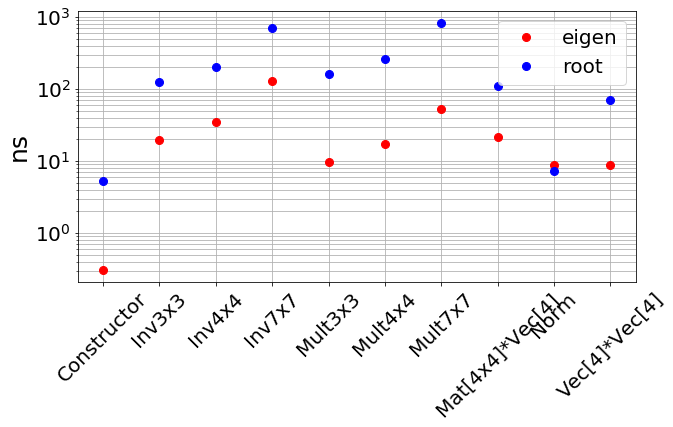

In [22]:
import matplotlib.pyplot as plt

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

plt.rc('font', **font)


plt.figure(figsize=(10,5))
plt.plot(tests, eigen, 'ro', label="eigen", markersize=8)
plt.plot(tests, root, 'bo', label="root", markersize=8)
plt.ylabel('ns', fontsize=25)
plt.grid(which="both")
plt.legend()
plt.xticks(rotation='45')
# plt.ylim(bottom=0)
plt.semilogy()
plt.savefig("figs/log.pdf", format='pdf', bbox_inches='tight')
plt.savefig("figs/log.png", format='png', bbox_inches='tight')
plt.show()

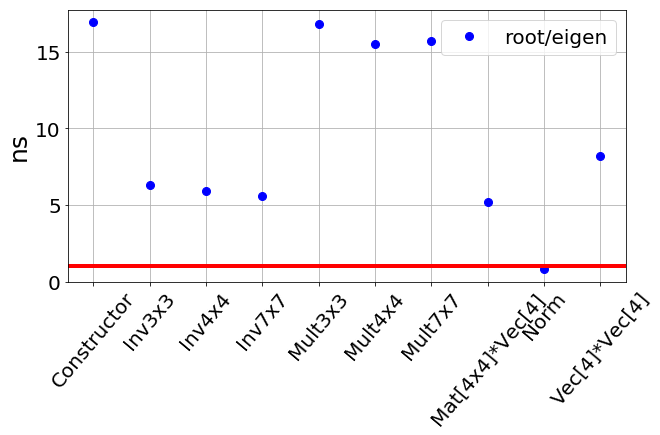

In [20]:
e = np.array(eigen)
r = np.array(root)

plt.figure(figsize=(10,5))
plt.plot(tests, r/e, 'bo', label="root/eigen", markersize=8)
plt.ylabel('ns', fontsize=25)
plt.grid(which='major')
plt.legend()
plt.ylim(bottom=0)
plt.xticks(rotation='50')
plt.axhline(y=1,linewidth=4, color='r')
plt.savefig("figs/ration.pdf", format='pdf', bbox_inches='tight')
plt.savefig("figs/ration.png", format='png', bbox_inches='tight')
plt.show()